In [11]:
import numpy as np
from scipy import linalg
import time
from numba import jit

Cholevksy factorization

In [12]:
@jit(nopython=True)
def cholevsky(A):
    """
    Computes the cholevsky factorization of an n x n positive matrix
    Assumes A is real valued for simplicity
    """
    m, n = A.shape
    if m != n:
        raise ValueError('Matrix must be square')
    L = np.zeros(A.shape)
    
    A = A.copy()
    for k in range(n):
        if A[k,k] <= 0:
            raise ValueError('Matrix must be positive definite')
        L[k,k] = np.sqrt(A[k,k])
        if k < n-1:
            L[k+1:,k] = A[k+1:,k]/L[k,k]
            A[k+1:,k+1:] += - np.outer(L[k+1:,k],L[k+1:,k])
    return L

In [13]:
n = 20
d = 40
X = np.random.randn(d,n)
C = X.T@X/d

In [14]:
L = cholevsky(C)
with np.printoptions(precision = 3,suppress=True):
    print(L[:10,:10])
print()
print('Is C = LL^T? {}'.format(np.allclose(C,L@L.T)))

[[ 0.996  0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [-0.096  1.171  0.     0.     0.     0.     0.     0.     0.     0.   ]
 [-0.188  0.018  0.791  0.     0.     0.     0.     0.     0.     0.   ]
 [-0.192  0.41  -0.13   1.098  0.     0.     0.     0.     0.     0.   ]
 [ 0.208  0.311 -0.216 -0.095  0.992  0.     0.     0.     0.     0.   ]
 [-0.255 -0.127 -0.038 -0.117  0.116  0.855  0.     0.     0.     0.   ]
 [ 0.137  0.245 -0.208  0.16  -0.048  0.135  0.892  0.     0.     0.   ]
 [-0.143 -0.084 -0.01  -0.045  0.129 -0.18  -0.018  0.885  0.     0.   ]
 [ 0.234  0.104  0.129 -0.36   0.012 -0.088  0.085 -0.116  0.982  0.   ]
 [-0.114  0.247  0.202  0.267 -0.027  0.183 -0.032  0.17   0.695  0.838]]

Is C = LL^T? True


In [15]:
%%time
n = 1000
d = 2000
X = np.random.randn(d,n)
C = X.T@X/d

CPU times: user 172 ms, sys: 8.21 ms, total: 180 ms
Wall time: 95.6 ms


In [16]:
%%time
L = cholevsky(C)
with np.printoptions(precision = 3,suppress=True):
    print(L[:10,:10])
print()
print('Is C = LL^T? {}'.format(np.allclose(C,L@L.T)))

[[ 0.973  0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.009  1.006  0.     0.     0.     0.     0.     0.     0.     0.   ]
 [-0.001  0.019  0.989  0.     0.     0.     0.     0.     0.     0.   ]
 [-0.014  0.07  -0.026  1.004  0.     0.     0.     0.     0.     0.   ]
 [ 0.026 -0.004  0.012 -0.003  0.986  0.     0.     0.     0.     0.   ]
 [-0.004 -0.013  0.004 -0.004  0.015  1.026  0.     0.     0.     0.   ]
 [ 0.016 -0.022  0.007  0.011  0.029  0.007  0.965  0.     0.     0.   ]
 [ 0.017 -0.054 -0.015  0.015 -0.015 -0.015  0.017  1.028  0.     0.   ]
 [ 0.034  0.051  0.007 -0.023 -0.039 -0.029  0.034  0.016  1.014  0.   ]
 [ 0.062  0.001  0.01   0.025  0.017 -0.002  0.002  0.025  0.039  0.99 ]]

Is C = LL^T? True
CPU times: user 1.89 s, sys: 455 ms, total: 2.34 s
Wall time: 2.27 s


In [17]:
%%time 
Lnp = np.linalg.cholesky(C)
with np.printoptions(precision = 3,suppress=True):
    print(Lnp[:10,:10])
    
print()
print('Is C = LL^T? {}'.format(np.allclose(C,Lnp@Lnp.T)))

[[ 0.973  0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.009  1.006  0.     0.     0.     0.     0.     0.     0.     0.   ]
 [-0.001  0.019  0.989  0.     0.     0.     0.     0.     0.     0.   ]
 [-0.014  0.07  -0.026  1.004  0.     0.     0.     0.     0.     0.   ]
 [ 0.026 -0.004  0.012 -0.003  0.986  0.     0.     0.     0.     0.   ]
 [-0.004 -0.013  0.004 -0.004  0.015  1.026  0.     0.     0.     0.   ]
 [ 0.016 -0.022  0.007  0.011  0.029  0.007  0.965  0.     0.     0.   ]
 [ 0.017 -0.054 -0.015  0.015 -0.015 -0.015  0.017  1.028  0.     0.   ]
 [ 0.034  0.051  0.007 -0.023 -0.039 -0.029  0.034  0.016  1.014  0.   ]
 [ 0.062  0.001  0.01   0.025  0.017 -0.002  0.002  0.025  0.039  0.99 ]]

Is C = LL^T? True
CPU times: user 136 ms, sys: 5.57 ms, total: 142 ms
Wall time: 41 ms


## One possible application

Suppose we wish to sample a random vector from a multivariate normal with mean zero and covariance $\Sigma \in \mathbb{R}^{n \times n}$. I.e. we want 

$$
x \sim \mathcal{N}(0,\Sigma)
$$

How do we do this if we only know how to sample variables that are $\mathcal{N}(0,1)$?





Answer: we sample $z = (z_1, \ldots, z_n)$ with independent $\mathcal{N}(0,1)$ entries and set:

$$
X = L z
$$

where $LL^T$ is a Cholevsky factorization of $\Sigma$.

In [18]:
def myMVN(Sigma,size):
    L = np.linalg.cholesky(Sigma)
    Z = np.random.randn(Sigma.shape[0],size)
    return L@Z #Each column is a sample from N(0,Sigma)


Let us see an example in which $n = 2$ and

$$
\Sigma = \begin{bmatrix} 1 & 0.7 \\ 0.7 & 1 \end{bmatrix}
$$

In [19]:
Sigma = np.array([[1,0.7],[0.7,1]])
size = 100 # we will generate 100 samples
X = myMVN(Sigma,size)

Let us look at our sample

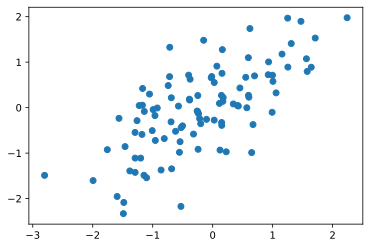

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

plt.scatter(X[0],X[1])
plt.show()